In [1]:
!conda install Pillow --yes

Solvindone

## Package Plan ##

  environment location: /Users/ykksfa/anaconda3/envs/vir_env

  added / updated specs:
    - pillow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libpng-1.6.37              |       ha441bb4_0         325 KB
    libtiff-4.1.0              |       hcb84e12_0         535 KB
    pillow-7.0.0               |   py37h4655f20_0         620 KB
    ------------------------------------------------------------
                                           Total:         1.4 MB

The following NEW packages will be INSTALLED:

  freetype           pkgs/main/osx-64::freetype-2.9.1-hb4e5f40_0
  jpeg               pkgs/main/osx-64::jpeg-9b-he5867d9_2
  libpng             pkgs/main/osx-64::libpng-1.6.37-ha441bb4_0
  libtiff            pkgs/main/osx-64::libtiff-4.1.0-hcb84e12_0
  olefile            pkgs/main/osx-64::olefile-0.46-py37_0
  pillow             pkgs/main/osx-64::

In [2]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))

In [4]:
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(3, activation='softmax'))


model.compile(loss='categorical_crossentropy', 
                optimizer=optimizers.RMSprop(lr=1e-4),
                metrics=['acc'])

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_dir = '/Users/ykksfa/Keio_Univ_SFC/CCLab-XMusic/DJ_Learning_AI/Fashion_Samples/idols/sakamichi/idol_sorting/train'
validation_dir = '/Users/ykksfa/Keio_Univ_SFC/CCLab-XMusic/DJ_Learning_AI/Fashion_Samples/idols/sakamichi/idol_sorting/validation'

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    # batch_size=32,
    class_mode='categorical')

Found 600 images belonging to 3 classes.


In [8]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    # batch_size=32,
    class_mode='categorical')

Found 300 images belonging to 3 classes.


In [22]:
history = model.fit_generator(train_generator,
                            steps_per_epoch=30,
                            epochs=100,
                            validation_data=validation_generator,
                            validation_steps=15)

Epoch 1/100
30/30 [==============================] - 25s 825ms/step - loss: 0.8303 - acc: 0.6500 - val_loss: 0.8814 - val_acc: 0.4600
Epoch 2/100
30/30 [==============================] - 23s 771ms/step - loss: 0.8156 - acc: 0.6450 - val_loss: 1.0230 - val_acc: 0.5333
Epoch 3/100
30/30 [==============================] - 23s 766ms/step - loss: 0.8164 - acc: 0.6450 - val_loss: 0.9277 - val_acc: 0.5333
Epoch 4/100
30/30 [==============================] - 23s 767ms/step - loss: 0.7928 - acc: 0.6700 - val_loss: 1.0044 - val_acc: 0.4800
Epoch 5/100
30/30 [==============================] - 23s 761ms/step - loss: 0.7449 - acc: 0.6833 - val_loss: 0.9375 - val_acc: 0.5333
Epoch 6/100
30/30 [==============================] - 23s 771ms/step - loss: 0.7190 - acc: 0.6900 - val_loss: 0.9987 - val_acc: 0.5467
Epoch 7/100
30/30 [==============================] - 23s 766ms/step - loss: 0.6929 - acc: 0.7067 - val_loss: 0.9812 - val_acc: 0.6000
Epoch 8/100
30/30 [==============================] - 23s 765ms

In [23]:
model.save('/Users/ykksfa/Keio_Univ_SFC/CCLab-XMusic/DJ_Learning_AI/Fashion_Samples/idols/sakamichi/learning_1')

In [24]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

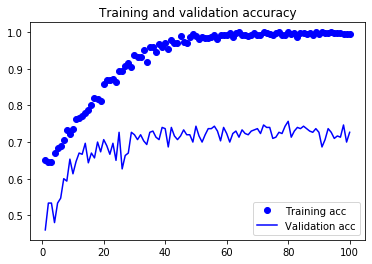

In [25]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

In [26]:
%matplotlib inline
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

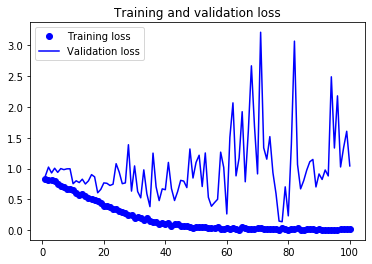

In [27]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()